# Titanic Ship Case Study
Problem Description: On April 15, 1912, during her maiden voyage, the Titanic sank after colliding
with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
 One of the reasons that the shipwreck led to such loss of life was that there were not
enough lifeboats for the passengers and crew.
 Although there was some element of luck involved in surviving the sinking, some groups of

people were more likely to survive than others, such as women, children, and the upper-
class.

The problem associated with the Titanic dataset is to predict whether a passenger survived the
disaster or not. The dataset contains various features such as passenger class, age, gender,
cabin, fare, and whether the passenger had any siblings or spouses on board. These features can
be used to build a predictive model to determine the likelihood of a passenger surviving the
disaster. The dataset offers opportunities for feature engineering, data visualization, and model
selection, making it a valuable resource for developing and testing data analysis and machine
learning skills.

Perform Below Tasks to complete the assignment:-
1. Download the dataset: Dataset
2. Load the dataset.
3. Perform Below Visualizations. 
   ● Univariate Analysis
   ● Bi - Variate Analysis
   ● Multi - Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Handle the Missing values.
6. Find the outliers and replace the outliers
7. Check for Categorical columns and perform encoding.
8. Split the data into dependent and independent variables.
9. Scale the independent variables
10. Split the data into training and testing

In [2]:
# Qns 2: Load the dataset
import pandas as pd
data = pd.read_csv("titanic.csv")

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fare', ylabel='age'>,
        <Axes: xlabel='survived', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fare'>,
        <Axes: xlabel='fare', ylabel='fare'>,
        <Axes: xlabel='survived', ylabel='fare'>],
       [<Axes: xlabel='age', ylabel='survived'>,
        <Axes: xlabel='fare', ylabel='survived'>,
        <Axes: xlabel='survived', ylabel='survived'>]], dtype=object)

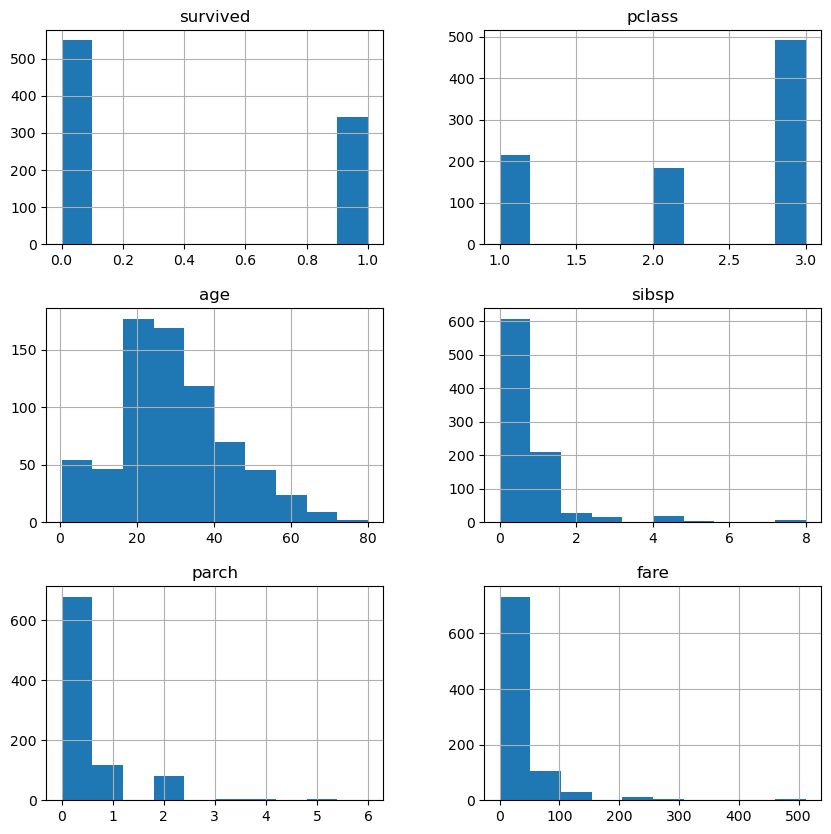

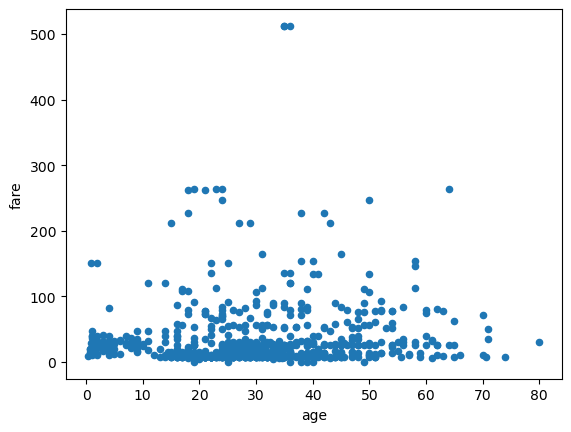

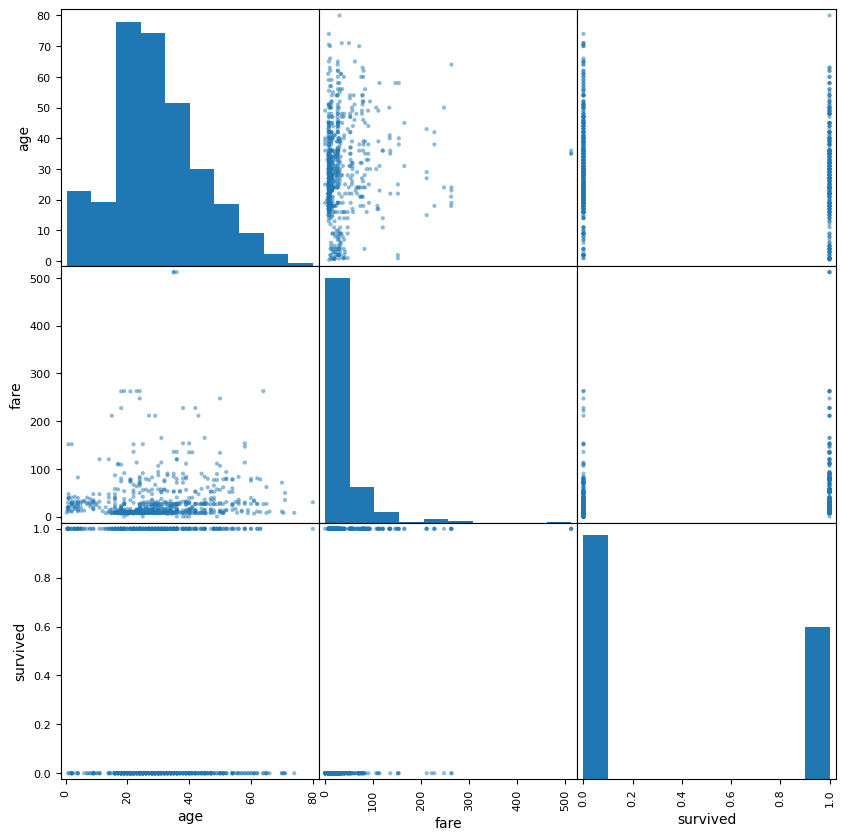

In [4]:
# Qns 3: Visualizations
data.hist(figsize=(10, 10))  # Univariate analysis
data.plot.scatter('age', 'fare')  # Bi-Variate analysis
pd.plotting.scatter_matrix(data[['age', 'fare', 'survived']], figsize=(10, 10))  # Multi-Variate analysis

In [5]:
# Qns 4: Descriptive statistics
statistics = data.describe()
print(statistics)

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [6]:
# Qns 5: Handling missing values
data.dropna(inplace=True)  # Dropping rows with missing values

In [8]:
# Step 6: Handling outliers (Example using Z-score)
z_scores = (data[['age', 'fare']] - data[['age', 'fare']].mean()) / data[['age', 'fare']].std()
data = data[(z_scores < 3).all(axis=1)]  # Remove rows with outliers (considering values beyond 3 standard deviations)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [16]:
# Step 7: Encoding categorical columns 
categorical_columns = ['sex', 'embarked','class','who','adult_male','deck','embark_town','alive','alone']
data_encoded = pd.get_dummies(data, columns=categorical_columns)
data_encoded

,survived,pclass,age,sibsp,parch,fare,sex_0,sex_1,embarked_0,embarked_1,...,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes,alone_False,alone_True
1,1,1,38.0,1,0,71.2833,1,0,1,0,...,0,0,0,1,0,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
6,0,1,54.0,0,0,51.8625,0,1,0,0,...,1,0,0,0,0,1,1,0,0,1
10,1,3,4.0,1,1,16.7000,1,0,0,0,...,0,0,1,0,0,1,0,1,1,0
11,1,1,58.0,0,0,26.5500,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
872,0,1,33.0,0,0,5.0000,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
879,1,1,56.0,0,1,83.1583,1,0,1,0,...,0,0,0,1,0,0,0,1,1,0
887,1,1,19.0,0,0,30.0000,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [17]:
# Step 8: Splitting into dependent and independent variables
X = data_encoded.drop('survived', axis=1)
y = data_encoded['survived']
print(X)
print(y)

     pclass   age  sibsp  parch     fare  sex_0  sex_1  embarked_0  \
1         1  38.0      1      0  71.2833      1      0           1   
3         1  35.0      1      0  53.1000      1      0           0   
6         1  54.0      0      0  51.8625      0      1           0   
10        3   4.0      1      1  16.7000      1      0           0   
11        1  58.0      0      0  26.5500      1      0           0   
..      ...   ...    ...    ...      ...    ...    ...         ...   
871       1  47.0      1      1  52.5542      1      0           0   
872       1  33.0      0      0   5.0000      0      1           0   
879       1  56.0      0      1  83.1583      1      0           1   
887       1  19.0      0      0  30.0000      1      0           0   
889       1  26.0      0      0  30.0000      0      1           1   

     embarked_1  embarked_2  ...  deck_E  deck_F  deck_G  \
1             0           0  ...       0       0       0   
3             0           1  ...       

In [18]:
# Step 9: Scaling independent variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.38313769,  0.13547329,  1.10395873, ...,  0.69798244,
         0.89096264, -0.89096264],
       [-0.38313769, -0.05639023,  1.10395873, ...,  0.69798244,
         0.89096264, -0.89096264],
       [-0.38313769,  1.15874545, -0.76098126, ..., -1.4327008 ,
        -1.12238151,  1.12238151],
       ...,
       [-0.38313769,  1.28665447, -0.76098126, ...,  0.69798244,
         0.89096264, -0.89096264],
       [-0.38313769, -1.07966239, -0.76098126, ...,  0.69798244,
        -1.12238151,  1.12238151],
       [-0.38313769, -0.63198082, -0.76098126, ...,  0.69798244,
        -1.12238151,  1.12238151]])

In [20]:
# Step 10: Splitting into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[-0.38313769  0.26338231 -0.76098126 ...  0.69798244 -1.12238151
   1.12238151]
 [-0.38313769  0.13547329 -0.76098126 ...  0.69798244 -1.12238151
   1.12238151]
 [ 3.42634561 -0.56802631 -0.76098126 ...  0.69798244  0.89096264
  -0.89096264]
 ...
 [-0.38313769 -0.82384435 -0.76098126 ...  0.69798244  0.89096264
  -0.89096264]
 [-0.38313769  1.22269996 -0.76098126 ... -1.4327008  -1.12238151
   1.12238151]
 [-0.38313769  0.58315486 -0.76098126 ... -1.4327008  -1.12238151
   1.12238151]]
609    1
716    1
823    1
245    0
710    1
      ..
370    1
550    1
97     1
492    0
536    0
Name: survived, Length: 139, dtype: int64
[[-0.38313769 -1.20757141  1.10395873 ...  0.69798244  0.89096264
  -0.89096264]
 [-0.38313769 -0.56802631  1.10395873 ...  0.69798244  0.89096264
  -0.89096264]
 [-0.38313769  0.51920035 -0.76098126 ...  0.69798244  0.89096264
  -0.89096264]
 ...
 [-0.38313769  0.64710937  1.10395873 ... -1.4327008   0.89096264
  -0.89096264]
 [ 1.52160396 -2.16688905  1.10395873 